In [62]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#Membaca Data Set
df = pd.read_csv('dataset.csv')
df.head(100)

,NamaBlok,JenisTanah,JenisDataran,KondisiDataran,PHTanah,KelasDrainase,Pruning,Pengendalianlalang,GarukPiringan,PenyemprotanPiringan,...,Urea(kg),MOP(kg),Dolomite(kg),ZincSulphate(ZnSO4)(kg),CopperSulphate(CuSO4)(kg),RockPhosphate(kg),NPK,HGFP,TSP,JenisBibit
0,1R16B120,Pasir,DataranRendah,Miring,10,TidakAda,0.0,1.0,0.0,2.0,...,1.0,1.5,1.0,0.05,0.05,0.00,0.0,0.0,0.0,ASD
1,2R16B120,Pasir,DataranRendah,Datar,10,TidakAda,0.0,1.0,0.0,2.0,...,1.0,1.5,1.0,0.05,0.05,0.00,0.0,0.0,0.0,ASD
2,4R16B120,Pasir,DataranRendah,Miring,10,TidakAda,0.0,1.0,0.0,2.0,...,1.0,1.5,1.0,0.05,0.05,0.00,0.0,0.0,0.0,ASD
3,5R16B120,Mineral,DataranRendah,Miring,10,TidakAda,0.0,1.0,0.0,2.0,...,1.0,1.5,1.0,0.05,0.05,0.00,0.0,0.0,0.0,ASD
4,2R17B120,Pasir,DataranRendah,Miring,8,TidakAda,0.0,1.0,0.0,2.0,...,1.0,1.5,1.0,0.05,0.05,0.00,0.0,0.0,0.0,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12S11A120,Pasir,Rawa-rawa,Datar,8,Sedang,1.0,2.0,0.0,2.0,...,1.0,1.5,0.0,0.05,0.05,0.75,0.0,0.0,0.0,ASD
96,13S11A120,Pasir,Rawa-rawa,Datar,9,Lancar,1.0,2.0,0.0,2.0,...,1.0,1.5,0.0,0.05,0.05,0.75,0.0,0.0,0.0,ASD
97,14S11A120,Pasir,Rawa-rawa,Datar,10,Lancar,1.0,2.0,0.0,2.0,...,1.0,1.5,0.0,0.05,0.05,0.75,0.0,0.0,0.0,ASD
98,15S11A120,Pasir,Rawa-rawa,Datar,11,Lancar,1.0,2.0,0.0,2.0,...,1.0,1.5,0.0,0.05,0.05,0.75,0.0,0.0,0.0,ASD


In [44]:
df.shape

(813, 22)

In [45]:
#menghapus Kolom Nama Blok
df.drop(['NamaBlok'],axis=1,inplace=True)

In [46]:
#Merubah (encode) nilai atribut menjadi Index Nilai
df['JenisTanah'] = df['JenisTanah'].replace("Pasir", "1")
df['JenisTanah'] = df['JenisTanah'].replace("Mineral", "2")

In [47]:
df['JenisDataran'] = df['JenisDataran'].replace("DataranRendah", "1")
df['JenisDataran'] = df['JenisDataran'].replace("Rawa-rawa", "2")

In [48]:
df['KondisiDataran'] = df['KondisiDataran'].replace("Miring", "1")
df['KondisiDataran'] = df['KondisiDataran'].replace("Datar", "2")

In [49]:
df['KelasDrainase'] = df['KelasDrainase'].replace("TidakAda", "1")
df['KelasDrainase'] = df['KelasDrainase'].replace("Lancar", "2")
df['KelasDrainase'] = df['KelasDrainase'].replace("Sedang", "3")
df['KelasDrainase'] = df['KelasDrainase'].replace("Terhambat", "4")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


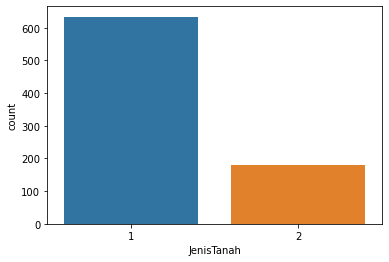

In [50]:
sns.countplot(df['JenisTanah'],label="Count")
plt.show()

In [51]:
df

,JenisTanah,JenisDataran,KondisiDataran,PHTanah,KelasDrainase,Pruning,Pengendalianlalang,GarukPiringan,PenyemprotanPiringan,BTP,...,Urea(kg),MOP(kg),Dolomite(kg),ZincSulphate(ZnSO4)(kg),CopperSulphate(CuSO4)(kg),RockPhosphate(kg),NPK,HGFP,TSP,JenisBibit
0,1,1,1,10,1,0.0,1.0,0.0,2.0,0.0,...,1.0,1.5,1.0,0.05,0.05,0.0,0.0,0.00,0.0,ASD
1,1,1,2,10,1,0.0,1.0,0.0,2.0,0.0,...,1.0,1.5,1.0,0.05,0.05,0.0,0.0,0.00,0.0,ASD
2,1,1,1,10,1,0.0,1.0,0.0,2.0,0.0,...,1.0,1.5,1.0,0.05,0.05,0.0,0.0,0.00,0.0,ASD
3,2,1,1,10,1,0.0,1.0,0.0,2.0,0.0,...,1.0,1.5,1.0,0.05,0.05,0.0,0.0,0.00,0.0,ASD
4,1,1,1,8,1,0.0,1.0,0.0,2.0,1.0,...,1.0,1.5,1.0,0.05,0.05,0.0,0.0,0.00,0.0,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1,2,2,10,4,0.0,2.0,1.0,2.0,1.0,...,1.0,2.7,0.0,0.00,0.03,1.0,1.2,0.05,0.0,ASD
809,2,1,1,11,1,1.0,1.0,0.0,2.0,1.0,...,1.0,1.5,0.0,0.00,0.00,0.0,0.0,0.00,0.0,ASD
810,2,1,2,8,2,0.0,1.0,0.0,2.0,1.0,...,1.0,1.5,0.0,0.00,0.00,0.0,0.0,0.00,0.0,ASD
811,1,1,1,6,1,0.0,1.0,0.0,2.0,1.0,...,1.0,1.5,0.0,0.05,0.05,0.0,0.0,0.00,0.0,ASD


In [52]:
df['JenisBibit']

0      ASD
1      ASD
2      ASD
3      ASD
4      ASD
      ... 
808    ASD
809    ASD
810    ASD
811    ASD
812    ASD
Name: JenisBibit, Length: 813, dtype: object

In [53]:
x = df.drop('JenisBibit', axis=1)
y = df['JenisBibit']

In [13]:
#X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.01)

In [54]:
#Pemodelan Naive Bayes
gnb = GaussianNB()
#model = gnb.fit(X_train, Y_train)

In [55]:
#y_pred = model.predict(X_test)

In [56]:
#print("Confusion Matrix: \n",confusion_matrix(Y_test, y_pred), "\n")
#print("Classification Report: \n",classification_report(Y_test, y_pred))

In [58]:
predict = cross_val_predict(estimator = gnb, X = x, y = y, cv = 10)

In [60]:
print("Confusion Matrix: \n",confusion_matrix(y, predict), "\n")
print("Classification Report: \n",classification_report(y, predict))

Confusion Matrix: 
 [[200 209]
 [ 74 330]] 

Classification Report: 
               precision    recall  f1-score   support

         ASD       0.73      0.49      0.59       409
         SRJ       0.61      0.82      0.70       404

    accuracy                           0.65       813
   macro avg       0.67      0.65      0.64       813
weighted avg       0.67      0.65      0.64       813



In [67]:
a = ["1R16B120","1","2","1",10,"1",0.00,1.00,0.00,2.00,0.00,1.00,1.00,1.50,1.00,0.05,0.05,0.00,0.00,0.00,0.00]

In [69]:
prediction = gnb.predict(a)
prediction_proba = classifier.predict_proba(a)

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.